In [129]:
import pandas as pd
df = pd.read_csv('ahousing.csv', header = None)
df.head()

,0,1,2,3,4
0,685000.0,64,3,4.907736,52.356157
1,475000.0,60,3,4.850476,52.348586
2,850000.0,109,4,4.944774,52.343782
3,580000.0,128,6,4.789928,52.343712
4,720000.0,138,5,4.902503,52.410538


In [130]:
m = len(df)

In [131]:
m

924

In [132]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,0,1,2,3,4
0,1,685000.0,64,3,4.907736,52.356157
1,1,475000.0,60,3,4.850476,52.348586
2,1,850000.0,109,4,4.944774,52.343782
3,1,580000.0,128,6,4.789928,52.343712
4,1,720000.0,138,5,4.902503,52.410538


In [133]:
import numpy as np
np.sum(df, axis=1).head()

0    685125.263893
1    475121.199062
2    850171.288556
3    580192.133640
4    720201.313041
dtype: float64

In [134]:
y = df.iloc[:, 3]

In [135]:
X = df.drop(columns=0)
X.head()

,00,1,2,3,4
0,1,64,3,4.907736,52.356157
1,1,60,3,4.850476,52.348586
2,1,109,4,4.944774,52.343782
3,1,128,6,4.789928,52.343712
4,1,138,5,4.902503,52.410538


In [136]:
for i in range(1, len(X.columns)):
    X[i] = X[i]/np.max(X[i])

In [137]:
X.head()

,00,1,2,3,4
0,1,0.102729,0.214286,0.975863,0.998710
1,1,0.096308,0.214286,0.964478,0.998565
2,1,0.174960,0.285714,0.983228,0.998474
3,1,0.205457,0.428571,0.952438,0.998472
4,1,0.221509,0.357143,0.974823,0.999747


In [138]:
import numpy as np
np.array([0]*len(X.columns))

array([0, 0, 0, 0, 0])

In [139]:
theta = np.array([0]*len(X.columns))

In [140]:
y1 = theta*X
y1=np.sum(y1, axis=1)

In [141]:
cost = sum(np.sqrt((y1-y)**2))/(2*len(df))
cost

1.7857142857142858

In [142]:
alpha=0.01
0-alpha*(sum((y1-y)*X.iloc[:,0])/942)

0.03503184713375796

In [143]:
def hypothesis(theta, X):
    return theta*X

In [144]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*942)

In [145]:
theta = np.array([0.0]*len(X.columns))
def gradientDescent(X, y, theta, alpha, i):
    #theta = np.array([0]*len(X.columns))
    J = []
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [146]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 5000)

In [147]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

In [148]:
range(len(y))

range(0, 924)

In [149]:
y_hat

0      2.923469
1      2.896730
2      3.985394
3      5.636915
4      4.940945
         ...   
919    1.750044
920    2.976694
921    2.836968
922    4.012085
923    3.785726
Length: 924, dtype: float64

In [150]:
len(y)

924

In [151]:
len(y_hat)

924

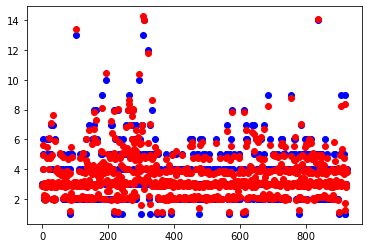

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 924)),y= y, color='blue')         
plt.scatter(x=list(range(0, 924)), y=y_hat, color='red')
plt.show()

In [153]:
X2 = df.drop(columns=2)

In [154]:
X1 = np.sum(X, axis=1)

In [155]:
X2_sum = np.sum(X2, axis=1)

In [156]:
cost = sum(np.sqrt((y_hat-y)**2))/(2*len(df))
cost

0.08023696115240919

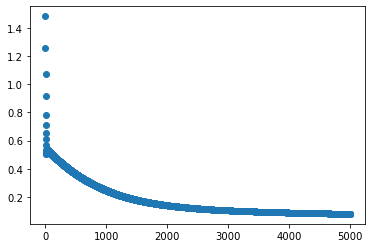

In [158]:
plt.figure()
plt.scatter(x=list(range(0, 5000)), y=J)
plt.show()

In [159]:
print(theta)

[ 0.09976213  4.13984413 10.67960196  0.01270934  0.09766287]


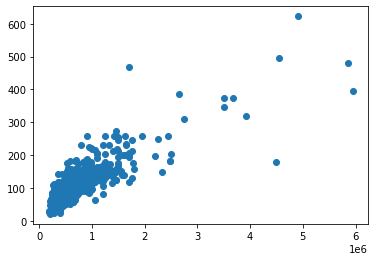

In [169]:
plt.figure()
plt.scatter(df[0], df[1], label = 'Original y')


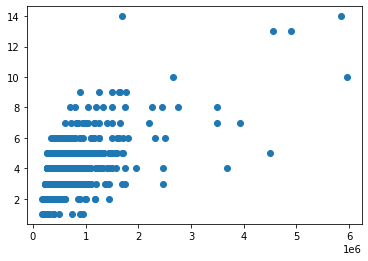

In [85]:
plt.scatter(df[0], df[2], label = 'Original y')

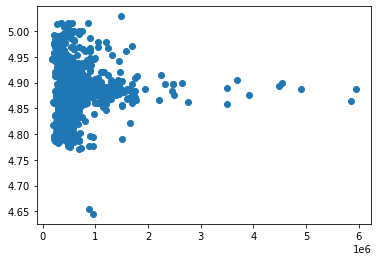

In [86]:
plt.scatter(df[0], df[3], label = 'Original y')

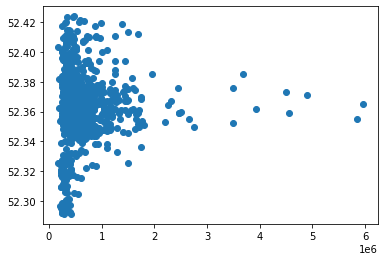

In [87]:
plt.scatter(df[0], df[4], label = 'Original y')

In [160]:
print(range(942))

range(0, 942)
